# Background On Disney Corporation

The Walt Disney Company, also known as Disney, is a global entertainment and media conglomerate. It was started by Walt Disney and his brother Roy O. Disney on October 16, 1923. Since then, it has grown into one of the biggest and best-known entertainment companies in the world.

Disney began as a small animation business that made short films. As the company grew, it started making longer animated films. Mickey Mouse, who made his first appearance in the animated short film "Steamboat Willie" in 1928, is one of their oldest and most well-known figures. Mickey Mouse became a popular and well-known character very quickly, which helped Disney build its name in the animation business.

Disney's business has grown and changed over the years. It is now involved in many different parts of the entertainment industry. Today, the company runs through several sections, such as Media Networks, Parks, Experiences and Products, Studio Entertainment, and Direct-to-Consumer & International.

The Media Networks section is made up of radio stations and streaming services, as well as TV networks like ABC, ESPN, and Disney Channel. Parks, Experiences, and Products includes theme parks (like Disneyland Resort and Walt Disney World Resort), cruise lines, resorts, and licencing of products.

The Studio Entertainment branch makes and sells films, both animated and live-action, under brands like Walt Disney Pictures, Pixar, Marvel Studios, and Lucasfilm (the company that started the Star Wars series).

In [1]:
import yfinance as yf
import numpy as np
#!pip install pandas numpy matplotlib pandas-datareader yfinance statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Dropout 
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam

C:\Users\andrew\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
from IPython.display import HTML # Code taken from class notes David McQuaid December 2022

HTML('''<script>

code_show=true; 

function code_toggle() {

 if (code_show){

 $('div.input').hide();

 } else {

 $('div.input').show();

 }

 code_show = !code_show

} 

$( document ).ready(code_toggle);

</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
arima = yf.download('DIS', start='2018-01-01', end='2023-01-01',interval='1d')
# Look at the data read
arima

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,108.949997,111.809998,108.559998,111.800003,108.726059,11014300
2018-01-03,112.190002,113.190002,111.449997,112.279999,109.192848,9237900
2018-01-04,112.949997,113.000000,111.629997,112.230003,109.144241,7417400
2018-01-05,112.680000,112.680000,111.239998,111.620003,108.551003,6008300
2018-01-08,110.889999,111.279999,109.540001,110.019997,106.994987,8052600
...,...,...,...,...,...,...
2022-12-23,86.059998,88.070000,85.769997,88.010002,88.010002,11171600
2022-12-27,87.419998,87.940002,85.959999,86.370003,86.370003,11561400
2022-12-28,86.080002,86.690002,84.070000,84.169998,84.169998,12399500


In [4]:
arima.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [5]:
arima.shape

(1259, 6)

In [6]:
arima.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,108.949997,111.809998,108.559998,111.800003,108.726059,11014300
2018-01-03,112.190002,113.190002,111.449997,112.279999,109.192848,9237900
2018-01-04,112.949997,113.000000,111.629997,112.230003,109.144241,7417400
2018-01-05,112.680000,112.680000,111.239998,111.620003,108.551003,6008300
2018-01-08,110.889999,111.279999,109.540001,110.019997,106.994987,8052600


In [7]:
arima.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,86.059998,88.070000,85.769997,88.010002,88.010002,11171600
2022-12-27,87.419998,87.940002,85.959999,86.370003,86.370003,11561400
2022-12-28,86.080002,86.690002,84.070000,84.169998,84.169998,12399500
2022-12-29,85.250000,88.239998,84.970001,87.180000,87.180000,13045100
2022-12-30,85.730003,87.120003,85.230003,86.879997,86.879997,23231000


In [8]:
arima.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
arima.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,131.317133,132.636831,129.772224,131.199785,130.478900,1.117715e+07
std,28.088778,28.256051,27.888532,28.045108,28.492404,7.388340e+06
min,84.489998,86.690002,79.070000,84.169998,84.169998,2.406300e+06
25%,109.605000,110.630001,108.285000,109.564999,107.984913,7.066400e+06
50%,125.629997,127.300003,123.680000,124.980003,124.980003,8.978400e+06
75%,147.349998,148.629997,145.974998,147.284996,146.830307,1.231935e+07
max,200.190002,203.020004,195.399994,201.910004,201.910004,8.741070e+07


it is important to use summary Statistics in Time Series analysis  as it gives a sense of spread ou our values. We can see from our close column that the stock hit a high of $201 and a low of $84.00. This spike in the share price may be due the fact the share may have risen due to the coronavirus. As primarily a media company the would have gained by lockdowns where people consumed much more media  content than normal. Here we can see the difficulties of time series where past values are used to predict future prices. A black swan event occurs like coronavirus and throws all our models out the window. 

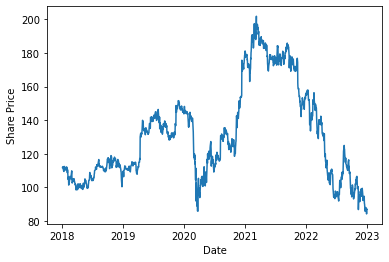

In [10]:
sns.lineplot(data=arima, x=arima.index, y="Close");
plt.ylabel("Share Price");

In [11]:
max_price=arima['Close'].max()
min_price=arima['Close'].min()
print(max_price)
print(min_price)

201.91000366210938
84.16999816894531


In [12]:
rolling_mean = arima['Close'].rolling(12).mean()
rolling_std = arima['Close'].rolling(12).std()

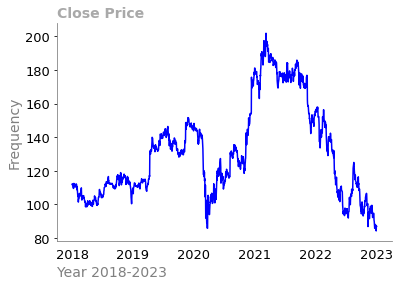

In [13]:
fig,ax=plt.subplots(1,1,figsize=(6,4))
plt.plot(arima['Close'], color="blue",label="Disney 5 Year Share Price ")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Close Price',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Year 2018-2023',fontsize=14,color='grey',loc='left')
plt.ylabel('Frequency',fontsize=14,color= 'grey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.tick_params(bottom = False)
plt.show()

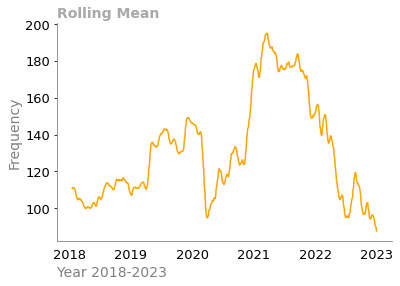

In [14]:
fig,ax=plt.subplots(1,1,figsize=(6,4))
plt.plot(rolling_mean, color="orange")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Rolling Mean',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Year 2018-2023',fontsize=14,color='grey',loc='left')
plt.ylabel('Frequency',fontsize=14,color= 'grey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.tick_params(bottom = False)
plt.show()

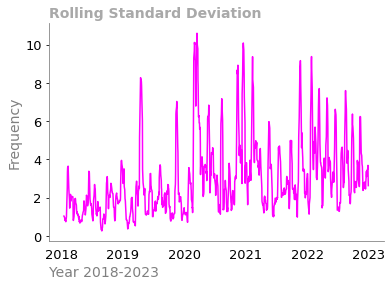

In [15]:
fig,ax=plt.subplots(1,1,figsize=(6,4))
plt.plot(rolling_std, color="fuchsia", label = 'Rolling Standard Deviation in Disney share Price')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Rolling Standard Deviation',fontsize=14,fontweight='bold',color='darkgrey',loc='left')
plt.xlabel('Year 2018-2023',fontsize=14,color='grey',loc='left')
plt.ylabel('Frequency',fontsize=14,color= 'grey')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_color('grey')
ax.tick_params(bottom = False)
plt.show()

In [1]:
plt.plot(arima['Close'], color="blue",label="Disney 5 Year Share Price ");
plt.plot(rolling_mean, color="orange", label="Rolling Mean Disney Shares");
plt.plot(rolling_std, color="fuchsia", label = 'Rolling Standard Deviation in Passenger Num');
plt.title("Amazon Share Price Time Series, Rolling Mean, Standard Deviation");


NameError: name 'plt' is not defined

This graph is important as it gives us a sense of the changes in the stock over time. the rolling mean and STD help identift a stock that is stable and more likly to shows signs of stationarity. This will help us use models like ARIMA that assume stationarity. If we saw a rolling mean for example that did not track the price that would suggest the the stock was not stationarity, we would have to use different degrees of differencing or transformation to achieve stationarity. However the downside of differencing or transformation is that we are removing long term data from our time series which is not ideal.

In [17]:
adft = adfuller(arima['Close'],autolag="AIC")

The adfuller is a statistical test which allows us to ascertain wherter our time series is stationarity. If it is we do not need to any more preprocessing and just fit our chosen model.

In [18]:
output_df = pd.DataFrame({"Close":[adft[0],
 adft[1],
 adft[2],
 adft[3],
 adft[4]['1%'],
 adft[4]['5%'],
 adft[4]['10%']],
 "Metric":["Test Statistics",
 "p-value",
"No. of lags used",
"Number of observations used",
"critical value (1%)",
"critical value (5%)",
"critical value (10%)"]})
print(output_df)

         Close                       Metric
0    -1.324635              Test Statistics
1     0.617828                      p-value
2    10.000000             No. of lags used
3  1248.000000  Number of observations used
4    -3.435601          critical value (1%)
5    -2.863859          critical value (5%)
6    -2.568004         critical value (10%)


As our p-value is a below .50 we can reject the null hypothesis and say our data is stationarity. We do not need to carry out any further actions such as differencing or transformation.

In [19]:
autocorrelation_lag1 = arima['Close'].autocorr(lag=30)
print("One Month Lag: ", autocorrelation_lag1)

One Month Lag:  0.8754928397946397


In [20]:
autocorrelation_lag3 = arima['Close'].autocorr(lag=90)
print("Three Month Lag: ", autocorrelation_lag3)
autocorrelation_lag6 = arima['Close'].autocorr(lag=190)
print("Six Month Lag: ", autocorrelation_lag6)
autocorrelation_lag9 = arima['Close'].autocorr(lag=270)
print("Nine Month Lag: ", autocorrelation_lag9)

Three Month Lag:  0.5780996824406153
Six Month Lag:  -0.09220272578996745
Nine Month Lag:  -0.33389748703107536


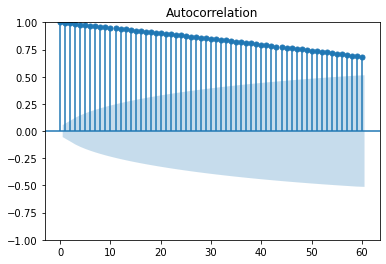

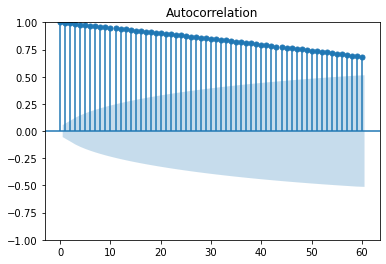

In [21]:
autocorrealtion=arima['Close'].autocorr()
plot_acf(arima['Close'],lags=60)

We have identified a negative autocorrelation this would suggest an inverse relationship between the  price and time lags. This is useful in model selection. We will use an arima model which can handle negative autocorrelation.

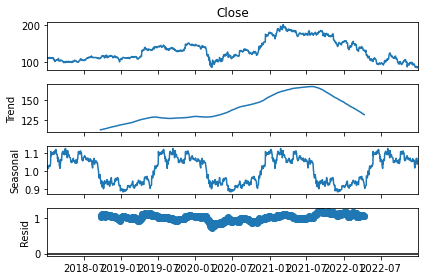

In [22]:
decompose = seasonal_decompose(arima["Close"],model='multiplicaive', period=365)
decompose.plot()
plt.show()

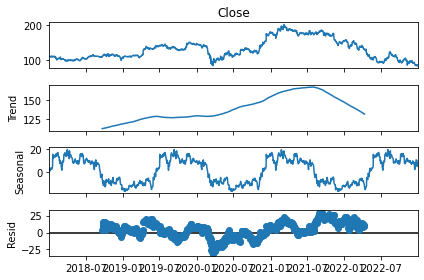

In [23]:
decompose = seasonal_decompose(arima['Close'],model='additive', period=365)
decompose.plot()
plt.show()

we have decompessed our time series which allows to observe patterns,repeating patterns and fluctuations in out time series. The additive model at capturing the variation in th time seirs which is not captured by the trend.

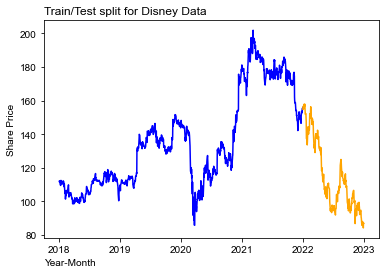

In [24]:
closing_prices = arima["Close"]
# Divide data into training and testing sets
train_data = closing_prices[:int(len(closing_prices) * 0.8)]
test_data = closing_prices[int(len(closing_prices) * 0.8):]
plt.plot(train_data, color = "blue")
plt.plot(test_data, color = "orange")
plt.title("Train/Test split for Disney Data",loc='left')
plt.ylabel("Share Price")
plt.xlabel('Year-Month',loc='left')
sns.set()
plt.show()

In [25]:
from pmdarima.arima import auto_arima
model = auto_arima(train_data, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_data)
forecast = model.predict(n_periods=len(test_data))
forecast = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4724.397, Time=1.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4737.739, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4727.761, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4727.924, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4736.038, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4728.094, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4731.759, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4735.670, Time=0.66 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4735.657, Time=0.75 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4729.756, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4733.660, Time=0.28 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4733.678, Time=0.28 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4728.375, Time=2.32 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4722.732, Time=0.66 sec
 ARIMA(1,1,2)(0,0,0)[0]          

C:\Users\andrew\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\andrew\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ARIMA(2,1,2)(0,0,0) model is a non-seasonal ARIMA model with an autoregressive component of order 2, a differencing component of order 1, and a moving average component of order 2

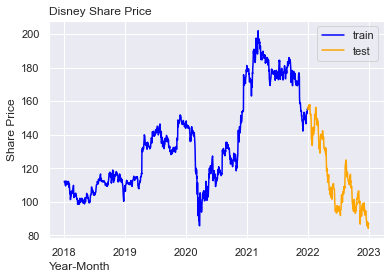

In [26]:
plt.plot(train_data, color = "blue", label="train")
plt.plot(test_data, color = "orange", label = "test")
plt.title("Disney Share Price",loc='left')
plt.ylabel("Share Price")
plt.xlabel('Year-Month',loc='left')
plt.legend(loc="best")
sns.set()
plt.show()

From yahoo finance on the 3rd of Janunary eas $88.98 which is just above where our test data suggested

In [27]:
model = ARIMA(train_data, order=(2, 1, 2))
model_fit = model.fit()

C:\Users\andrew\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\andrew\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\andrew\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
predictions = model_fit.forecast(steps=len(test_data))
rmse = sqrt(mean_squared_error(test_data, predictions))
print("RMSE: ", rmse)

RMSE:  46.23796983290074


C:\Users\andrew\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\andrew\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Our RMSE measures the loss in our model. Our models has only captured roughly none of the current stock price. This is probaly due the fact that arima uses auto correlations and moving values to predict future values from historical data. This proves my original  theory that spike in share from the corona virus made id difficult for our model to make acurate predictions. However the reason we carried out ARIMA modelling was to provide a benchmark for our LTSM model.

In [29]:
mse_ARIMA= mean_squared_error(test_data,predictions)
rmse_ARIMA=sqrt(mean_squared_error(test_data,predictions))
mae_ARIMA=mean_absolute_error(test_data,predictions)

print('Mean Squared Error(MSE) of ARIMA Model', mse_ARIMA)
print('')
print('Root Mean Squared Error(RMSE) of ARIMA Model', rmse_ARIMA)
print('')
print('Mean Absolute Error(MSE) of ARIMA Model', mae_ARIMA)

Mean Squared Error(MSE) of ARIMA Model 2137.949854268239

Root Mean Squared Error(RMSE) of ARIMA Model 46.23796983290074

Mean Absolute Error(MSE) of ARIMA Model 41.52860474103771


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_data, label="Training data")
plt.plot(test_data, label="Actual closing prices")
plt.plot(test_data.index, predictions, label="Predicted closing prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title(f"{symbol} Stock Closing Price Prediction using ARIMA")
plt.legend()
plt.show()

In [30]:
shares_df = yf.download('DIS', start='2018-06-26', end='2023-06-26',interval='1d')
# Look at the data read
shares_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-26,104.459999,104.709999,103.910004,104.260002,101.393372,6550000
2018-06-27,104.500000,105.879997,103.480003,103.959999,101.101616,8803300
2018-06-28,103.910004,105.120003,103.680000,104.769997,101.889343,6303600
2018-06-29,104.930000,105.680000,104.650002,104.809998,101.928238,6774000
2018-07-02,104.150002,105.370003,103.900002,105.330002,102.433952,5488900
...,...,...,...,...,...,...
2023-06-16,92.879997,92.970001,90.860001,91.320000,91.320000,22665000
2023-06-20,90.290001,90.779999,89.739998,89.750000,89.750000,14939200
2023-06-21,89.550003,89.669998,88.110001,88.639999,88.639999,17873000


In [31]:
test_size=12

disney_train=shares_df[ :-test_size]
disney_test= shares_df[ :test_size]

In [32]:
training_data = disney_train.iloc[:, 4].values 

we return our close colum as a numpy array. This close column can be used for futher numerical analysis or be used to train a machine learning model

In [33]:
from sklearn.preprocessing import MinMaxScaler 

In [34]:
scaler = MinMaxScaler() 

Scikit-learn is a library for machine learning that is used  commonly. In addition to the MinMaxScaler, it has several other useful scaling options such as Standard Scaler, Robust Scaler & Max abs Scaler among maany others.

We have used a MinMaxScaler() to transform our data in to a specific range between 0 & 1 this can benefit by normalising our data which ensures our features have similar ranges of values.It can ensure no one feature has too big effect on our model. It can also help with outliers to ensure they do a have a disproportionate on our algortihms.

It should be noted the values are of no use to we are merely seeking to find patterns in the relationships of our variables.
The scaler used will be determined by the job at hand and some algorithms such as  tree based modes do not need to be scaled however as our model is a RNN neural network we are required to scale our data.

In [35]:
training_data = scaler.fit_transform(training_data.reshape(-1, 1))

In [36]:
x_training_data = [] 
y_training_data =[]

In [37]:
for i in range(40, len(training_data)): 
 x_training_data.append(training_data[i-40:i, 0]) 
 y_training_data.append(training_data[i, 0]) 

The code above helps us get ready to train a model by making chains of pairs of inputs and outputs. This lets the model learn from what it has seen in the past and make predictions based on how things have been in the past

In [38]:
x_training_data = np.array(x_training_data) 
y_training_data = np.array(y_training_data) 

In [39]:
print(x_training_data.shape) 
print(y_training_data.shape) 

(1205, 40)
(1205,)


In [40]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], 
 x_training_data.shape[1], 
 1)) 


We have converted the x_training_data and y_training_data lists to NumPy arrays because models like LSTM expect the data to provided as this data type

In [41]:
print(x_training_data.shape) 

(1205, 40, 1)


In [42]:
rnn = Sequential()

We used the Sequential class in Keras because it makes making models easier, makes code easier to read, and makes it easier to see how our models work.

In [43]:
rnn.add(LSTM(units = 45, return_sequences = True, input_shape = 
(x_training_data.shape[1], 1)))

In [44]:
rnn.add(Dropout(0.2))

We have added a dropout layer which is a reguralization technique that prevents overfitting

In [45]:
for i in [True, True, False]: 
 rnn.add(LSTM(units = 45, return_sequences = i)) 
 rnn.add(Dropout(0.2)) 

In [46]:
rnn.add(Dense(units = 1))

we have added i laver to our LSTM, seen this a regression model adding one layer is agood initial first step. when we move on to tuning we may add on extra layers. 

In [47]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error') 


The choice of optimizer and loss function can have a big effect on how well the model learns, how quickly it converges, and how well it can reduce loss in our mode

In [48]:
history=rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 40,validation_split=.02) 

Epoch 1/100
30/30 [==============================] - 13s 146ms/step - loss: 0.0335 - val_loss: 0.0044
Epoch 2/100
30/30 [==============================] - 2s 82ms/step - loss: 0.0100 - val_loss: 0.0056
Epoch 3/100
30/30 [==============================] - 2s 81ms/step - loss: 0.0090 - val_loss: 0.0034
Epoch 4/100
30/30 [==============================] - 2s 83ms/step - loss: 0.0072 - val_loss: 0.0036
Epoch 5/100
30/30 [==============================] - 3s 87ms/step - loss: 0.0068 - val_loss: 0.0038
Epoch 6/100
30/30 [==============================] - 2s 81ms/step - loss: 0.0082 - val_loss: 0.0029
Epoch 7/100
30/30 [==============================] - 3s 85ms/step - loss: 0.0077 - val_loss: 0.0023
Epoch 8/100
30/30 [==============================] - 4s 140ms/step - loss: 0.0061 - val_loss: 0.0032
Epoch 9/100
30/30 [==============================] - 4s 149ms/step - loss: 0.0055 - val_loss: 0.0029
Epoch 10/100
30/30 [==============================] - 4s 130ms/step - loss: 0.0054 - val_loss: 0

The codes above is needed in order to train an RNN model. It lets the model learn from the data it is given and the numbers it is supposed to reach, improving its performance over time. we can fine-tune the training process  bu using gridsearch to get the model performance you want by changing the batch size and the number of epochs.

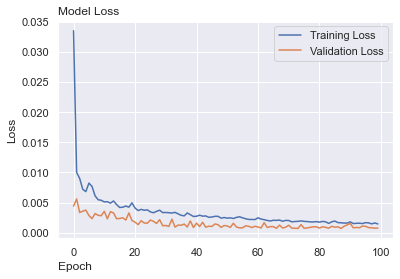

In [64]:
plt.plot(history.history['loss'],label='Training Loss');
plt.plot(history.history['val_loss'], label= 'Validation Loss');
plt.title('Model Loss', loc='left');
plt.xlabel('Epoch',loc='left');
plt.ylabel('Loss');
plt.legend();

We can see that our model has trained well meaning it is  finding patterns within data we will need to carry out some hyperameter tuning but it may be off little use.

In [65]:
test_data = disney_test 
test_data = disney_test.iloc[:, 3].values 

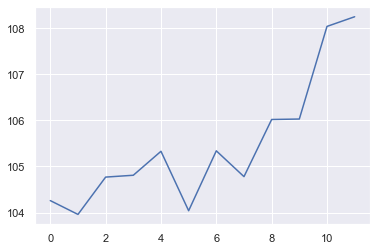

In [66]:
plt.plot(test_data);

In [67]:
unscaled_training_data = disney_train
unscaled_test_data = disney_test 

In [68]:
all_data=pd.concat((unscaled_training_data['Close'], 
unscaled_test_data['Close']), axis = 0) 

We have added out training_data and test_data together in to a single series this will help us in future data preparation and visualization.

In [69]:
x_test_data = all_data[len(all_data) - len(test_data) - 40:].values 
x_test_data = np.reshape(x_test_data, (-1, 1)) 

In [70]:
x_test_data = scaler.transform(x_test_data) 

In [71]:
final_x_test_data = [] 
for i in range(40, len(x_test_data)): 
 final_x_test_data.append(x_test_data[i-40:i, 0]) 
final_x_test_data = np.array(final_x_test_data) 

In [72]:
final_x_test_data=np.reshape(final_x_test_data, 
(final_x_test_data.shape[0], final_x_test_data.shape[1], 1)) 

In [73]:
predictions = rnn.predict(final_x_test_data) 


1/1 [==============================] - 0s 47ms/step


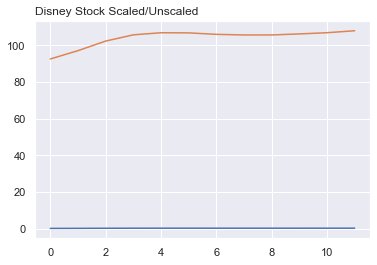

In [74]:
#Plotting our predicted values 
plt.clf() #This clears the old plot from our canvas 
plt.plot(predictions,label='Scaled Predictions');
#Unscaling the predicted values and re-plotting the data 
unscaled_predictions = scaler.inverse_transform(predictions); 
plt.plot(unscaled_predictions,label='Unscaled Predictions');
plt.title('Disney Stock Scaled/Unscaled',loc='left');

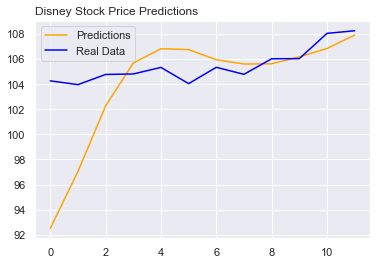

In [75]:
#Plotting the predicted values against Facebook's actual stock price 
plt.plot(unscaled_predictions, color = 'orange', label = "Predictions"); 
plt.plot(test_data, color = 'blue', label = "Real Data"); 
plt.title('Disney Stock Price Predictions',loc='left') ;
plt.legend();

In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [62]:
mse_LSTM= mean_squared_error(test_data,unscaled_predictions)
rmse_LSTM=mean_squared_error(test_data,unscaled_predictions,squared=False)
mae_LSTM=mean_absolute_error(test_data,unscaled_predictions)
mse_ARIMA= mean_squared_error(test_data,predictions)
rmse_ARIMA=sqrt(mean_squared_error(test_data,predictions))
mae_ARIMA=mean_absolute_error(test_data,predictions)
print('Mean Squared Error(MSE) of LSTM Model with Tuning:', mse_LSTM)
print('Mean Squared Error(MSE) of ARIMA Model', mse_ARIMA)
print('')
print('Root Mean Squared Error(RMSE) of LSTM Model with Tuning:', rmse_LSTM)
print('Root Mean Squared Error(RMSE) of ARIMA Model', rmse_ARIMA)
print('')
print('Mean Absolute Error(MSE) of LSTM Model with Tuning ', mae_LSTM)
print('Mean Absolute Error(MSE) of ARIMA Model', mae_ARIMA)



Mean Squared Error(MSE) of LSTM Model with Tuning: 17.095132615111652
Mean Squared Error(MSE) of ARIMA Model 11089.869000621598

Root Mean Squared Error(RMSE) of LSTM Model with Tuning: 4.134626055051611
Root Mean Squared Error(RMSE) of ARIMA Model 105.30844695759974

Mean Absolute Error(MSE) of LSTM Model with Tuning  2.4788074493408203
Mean Absolute Error(MSE) of ARIMA Model 105.29992798094948


In [63]:
#Nickolas Discoll, 2023.  Stock Price Prediction LSTM Hyperparameter Tuning.: https://medium.com/@redeaddiscolll/stock-price-prediction-lstm-hyperparameter-tuning-ad69d409ae29 [Accessed 6 July 2023].
#param_grid = {
    #'batch_size': [10, 20, 40, 60, 80, 100],
    #'epochs': [10, 50, 100],
    #'learning_rate': [0.001, 0.01, 0.1]}
    #def create_model(learning_rate):
 # create model
 #model = Sequential()
# model.add(Dense(12, activation='relu',input_shape=(x_training_data.shape[1],)))
# model.add(Dense(1, activation='sigmoid'))
 # Compile model
# model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=learning_rate))
# return model
#seed = 7
#tf.random.set_seed(seed)
#regressor=KerasRegressor(build_fn=create_model)
#from tensorflow.keras.callbacks import EarlyStopping
#grid = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3)
#grid_result = grid.fit(x_training_data, y_training_data,callbacks=[EarlyStopping(patience=50)])

#print("Best parameters: ", grid_result.best_params_)
#print("Best score: ", grid_result.best_score_)
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))
    #pip install scikeras